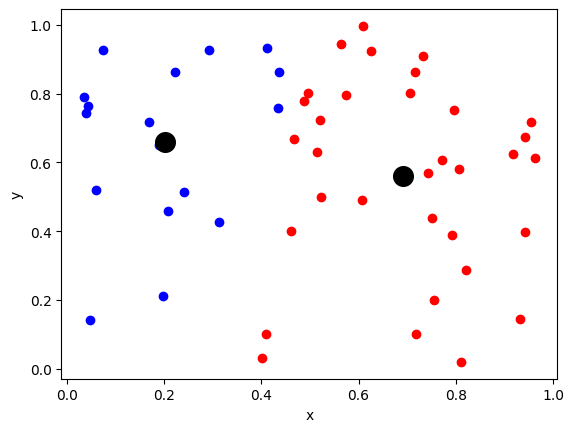

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

data = np.random.rand(50, 2) # example data
model = KMeans(n_clusters=2, n_init='auto')
model.fit(data)
labels = model.predict(data) # group index array
centers = model.cluster_centers_
# Plot the data points and centroids
colors = ['red', 'blue']
for i in range(len(data)):
    plt.scatter(data[i, 0], data[i, 1], color=colors[labels[i]])
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=200, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

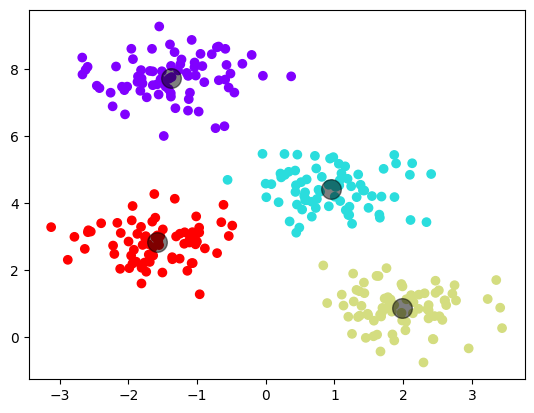

In [81]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
model = AgglomerativeClustering(n_clusters=4, linkage='ward') # Not built in ability to compute the centers
labels = model.fit_predict(X)

def cluster_centers(labels, X, n_clusters):
    centers = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        centers[i] = np.mean(X[labels == i], axis=0)
    return centers

centers = cluster_centers(labels, X, 4)
# Plot the results
plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.show()

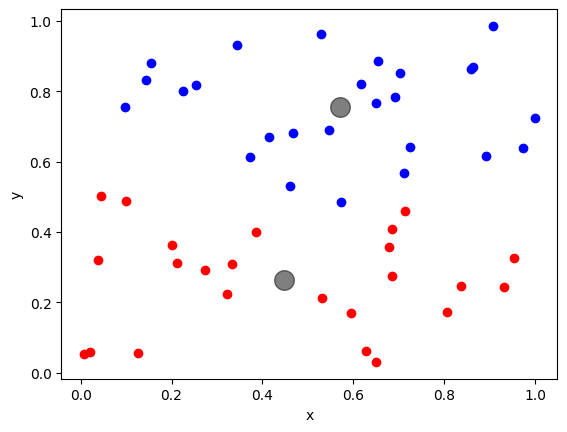

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

data = np.random.rand(50, 2) # example data
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = model.fit_predict(data)

def cluster_centers(data, labels):
    centers = np.empty((0, data.shape[1]))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        mask = labels == label
        cluster_points = data[mask]
        center = np.mean(cluster_points, axis=0)
        centers = np.vstack((centers, center))
    return centers

centers = cluster_centers(data, labels)
# Plot the data points and centroids
colors = ['red', 'blue']
for i in range(len(data)):
    plt.scatter(data[i, 0], data[i, 1], color=colors[labels[i]])
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

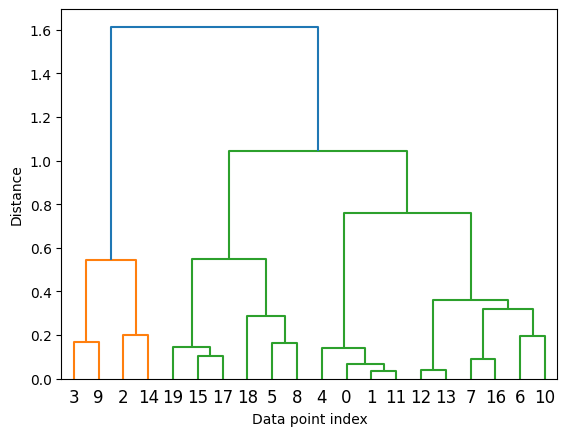

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

data = np.random.rand(20, 2) # example data
linkage_matrix = linkage(data, method='ward') # minimize the variance of the distances between the clusters being merged
# Plot the dendrogram
dendrogram(linkage_matrix)
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()

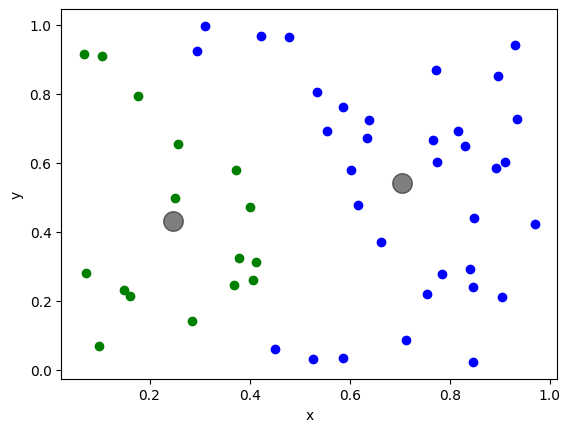

In [116]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(50, 2) # example data
model = DBSCAN(eps=0.175, min_samples=2)
labels = model.fit_predict(data)

def cluster_centers(data, labels):
    centers = np.empty((0, data.shape[1]))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        mask = labels == label
        cluster_points = data[mask]
        center = np.mean(cluster_points, axis=0)
        centers = np.vstack((centers, center))
    return centers

centers = cluster_centers(data, labels)
# Plot the data points and cluster labels
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(len(data)):
    plt.scatter(data[i, 0], data[i, 1], color=colors[labels[i] + 1])
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()